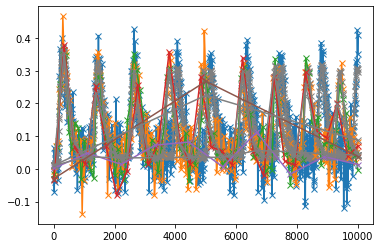

In [2]:
import pyabc
from study_abc_noise.model import HodgkinHuxleyModelVars as ModelVars
import matplotlib.pyplot as plt
import numpy as np
import os
import logging
import pickle
%matplotlib inline

# for debugging
for module in ['Distance', 'Acceptor', 'Epsilon']:
    logger = logging.getLogger(module)
    logger.setLevel(logging.DEBUG)
    fh = logging.FileHandler('log/logger_laplace.log')
    fh.setLevel(logging.DEBUG)
    logger.addHandler(fh)

arr_n_t = [3, 10, 30, 100, 300, 1000]

# create data
for n_t in reversed(arr_n_t):
    fn = f"data/data_{n_t}.p"
    mv = ModelVars(n_t=n_t, basedir='..')
    if not os.path.isfile(fn):
        print(f"generate data for time {n_t}")
        data_exact = mv.get_model()(mv.p_true)
        data = mv.add_noise_to_data(data_exact)
        pickle.dump((data_exact, data), open(fn, "wb"))
    data_exact, data = pickle.load(open(fn, "rb"))
    plt.plot(mv.get_obs_times(), data['K'], 'x-')
    plt.plot(mv.get_obs_times(), data_exact['K'], 'x-', color='grey')

In [17]:
# proposed method

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"hh_{n_t}_stochacc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

INFO:History:Start <ABCSMC(id=1, start_time=2019-12-20 11:51:22.629297, end_time=None)>
INFO:ABC:Calibration sample before t=0.
Process Process-4:
Process Process-18:
Process Process-17:
Process Process-13:
Process Process-15:
Traceback (most recent call last):
Process Process-12:
Process Process-20:
Process Process-8:
Traceback (most recent call last):
Process Process-3:
Traceback (most recent call last):
Process Process-16:
Process Process-6:
Process Process-9:
Process Process-2:
Process Process-19:
Process Process-7:
Process Process-11:
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/a

  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/sampler/multicore_evaluation_parallel.py", line 32, in work
    new_sim = simulate_one()
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars)
  File "/home/yannik/pyabc/pyabc/smc.py", line 490, in simulate_one
    t, theta, summary_statistics)
  File "/home/yannik/pyabc/pyabc/smc.py", line 490, in simulate_one
    t, theta, summary_statistics)
  File "/home/yannik/pyabc/pyabc/smc.py", line 490, in simulate_one
    t, theta, summary_statistics)
  File "/home/yannik/pyabc/pyabc/smc.py", line 490, in simulate_one
    t, theta, summary_statistics)
  File "/home/yannik/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._ar

  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 926, in communicate
    stdout = self.stdout.read()
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in

KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/model.py", line 270, in sample
    return self.sample_function(pars)
  File "/home/yannik/anaconda3/lib/python3.7/subprocess.py", line 474, in run
    stdout, stderr = process.communicate(input, timeout=timeout)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 55, in model
    val = simulate(**p, executable=self.executable)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
KeyboardInterrupt
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study-ABC-Noise/study_abc_noise/model/hodgkin_huxley.py", line 116, in simulate
    stdout=subprocess.PIPE)
  File "/home/yannik/Documents/Project8_pyABC_Noise/Study

In [ ]:
# sequential but bad c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"hh_{n_t}_stochacc_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()

In [ ]:
# rejection with adaptive c (in general not applicable)

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"hh_{n_t}_rejection"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# rejection with bad (but correct) c

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"hh_{n_t}_rejection_badc"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_kernel(),
        eps=pyabc.Temperature(log_file=f"log/log_temperature_{fb}.json"),
        acceptor=pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel,
                                          log_file=f"log/log_acceptor_{fb}.json"),
        population_size=1000,
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(max_nr_populations=1, min_acceptance_rate=1e-3)
    print()

In [ ]:
# noisy model

for n_t in arr_n_t:
    mv = ModelVars(n_t=n_t)
    fb = f"hh_{n_t}_noisymodel"
    if os.path.isfile(f"{fb}.db"):
        continue
    abc = pyabc.ABCSMC(
        models=mv.get_model_noisy(),
        parameter_priors=mv.get_prior(),
        distance_function=mv.get_distance(),
        population_size=1000,
        sampler=pyabc.sampler.MulticoreEvalParallelSampler(n_procs=20, check_max_eval=True)
    )
    data = pickle.load(open(f"data/data_{n_t}.p", "rb"))[1]
    abc.new(f"sqlite:///{fb}.db", data)
    abc.run(min_acceptance_rate=1e-3)
    print()